<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793108/blob/main/MNA_IAyAA_semana_6_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [2]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PowerTransformer, power_transform
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, train_test_split, learning_curve, validation_curve, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

#**Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como
se indica en la página de la UCI. 

NOTA: Si lo deseas, puedes traducirlos y ponerlas en español. 



In [6]:
DataCredit =pd.read_csv("SouthGermanCredit.asc", sep=" ")
DataCredit

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [7]:
DataCredit.info() ## al parecer no existen datos perdidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [8]:
traduccion={
"laufkont" : "status",                                           
"laufzeit" : "duration",
"moral" : "credit_history",
"verw" : "purpose",
"hoehe" : "amount",
"sparkont" : "savings",        
"beszeit" : "employment_duration",
"rate" : "installment_rate",
"famges" : "personal_status_sex",
"buerge" : "other_debtors",
"wohnzeit" : "present_residence",
"verm" : "property",
"alter" : "age",
"weitkred" : "other_installment_plans",
"wohn" : "housing",
"bishkred" : "number_credits",
"beruf" : "job",
"pers" : "people_liable",
"telef" : "telephone",
"gastarb" : "foreign_worker",
"kredit" : "credit_risk"
}

### cambiar el nombre de las columnas
DataCredit.rename(columns = traduccion, inplace = True)

#**Ejercicio-2.**


In [9]:
# variables independientes  
X = DataCredit.drop("credit_risk", axis = 1)
# variable dependiente 
y = DataCredit["credit_risk"]
print(y.value_counts()) ### al parecer no esta notablemente desbalanceado, tal vez no sea nuestra preocupacion 

1    700
0    300
Name: credit_risk, dtype: int64


In [10]:
## divicion de set de entrenamiento y prueba
X_tv, X_test, ytv, y_test = train_test_split(X, y, test_size = .15, shuffle=True, random_state=1, stratify=y)

#**Ejercicio-3.**



In [11]:
X_tv.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.584706,20.834118,2.536471,2.730588,3312.940000,2.104706,3.365882,2.955294,2.677647,1.150588,2.850588,2.342353,35.497647,2.680000,1.920000,1.411765,2.917647,1.850588,1.395294,1.963529
std,1.265842,12.084197,1.080597,2.673278,2856.926831,1.575610,1.213980,1.122792,0.713058,0.488652,1.118442,1.054116,11.307278,0.702478,0.530084,0.582309,0.642283,0.356704,0.489202,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1365.750000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2321.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,4012.500000,3.000000,4.000000,4.000000,3.000000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


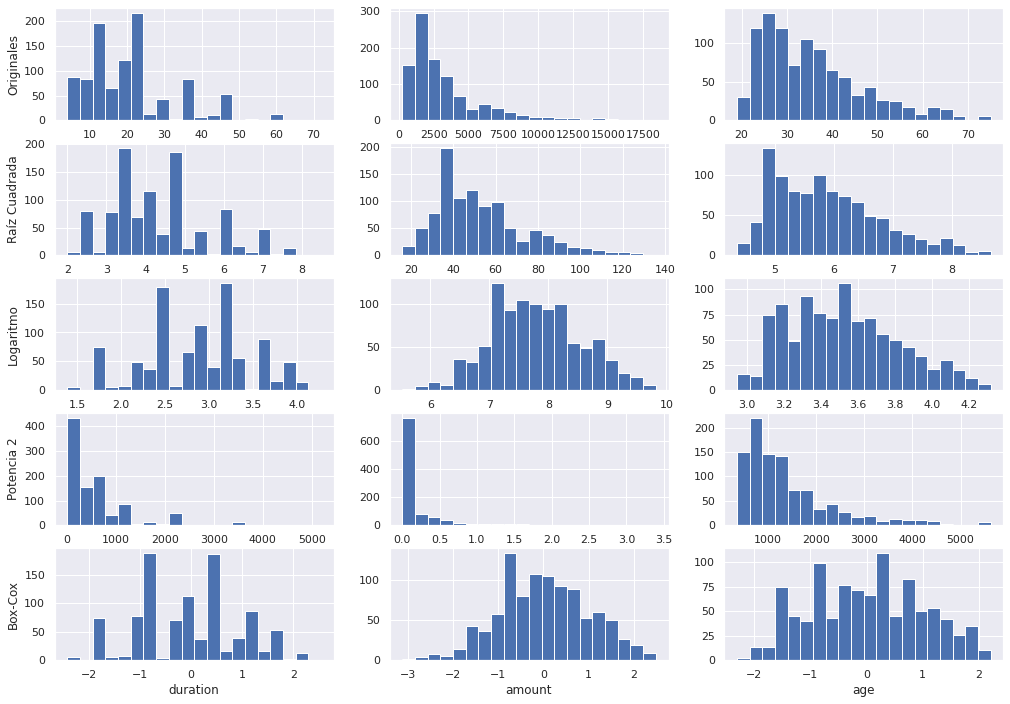

In [12]:
#Pre visualization

variables_a_transformar = [ 'duration',  'amount',  'age']


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 3)    
  
for k in range(0,3):       

    # Datos originales ---------------------------------------------------------
    plt.subplot(5,3,k+1) 

    
    Transf0 = X[variables_a_transformar[k]]          #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(Transf0, bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')
    


    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,3,k+4)    

    Transf1 = np.sqrt(X[variables_a_transformar[k]])          #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(Transf1, bins=20)                      #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')
    

    
    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,3,k+7)     

    Transf2 = np.log(X[variables_a_transformar[k]])          #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(Transf2, bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')
    
    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,3,k+10)

    Transf3 = np.power(X[variables_a_transformar[k]],2)          #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    plt.hist(Transf3, bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')
    

    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,3,k+13)

    
    Transf4 = power_transform(X[variables_a_transformar[k]].to_numpy().reshape(-1, 1), method='box-cox')        #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(Transf4, bins=20)                     #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Box-Cox') 

plt.show()

(36, 20)


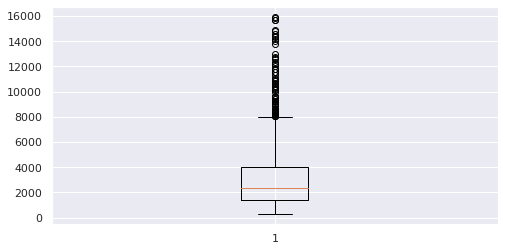

(14, 20)


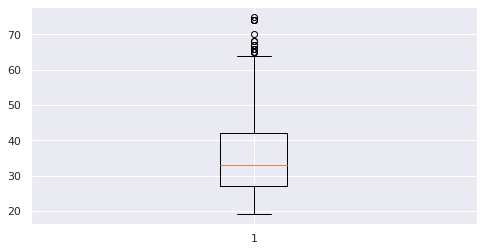

(14, 20)


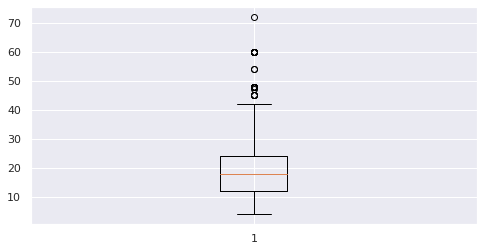

In [195]:
## por medio del grafico podemos observar algunos valores atipicos que nos podrian
## generar distorsion en el escalamiento
## o podemos realizar una transformacion box-cox que pueda ademas de tratar estos
## outliers ayudar a que los datos tengan una normalizacion, para ayudar a la 
## convergencia de los datos
print(X_tv[X_tv.amount > 10000].shape )
plt.boxplot(X_tv.amount)
plt.show()
print(X_tv[X_tv.age > 65].shape)
plt.boxplot(X_tv.age)
plt.show()
print(X_tv[X_tv.duration > 50].shape)
plt.boxplot(X_tv.duration)
plt.show()

In [156]:
print(X_tv.isna().any())
print(X_tv.isnull().any())

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
dtype: bool
status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              Fals

Consideramos aplicar las siguientes aplicaciones a las variables numericas

Se aplica una transformación One-Hot a las variables binarias porque

In [13]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),                                 
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2))),
                                 ('BoxCoxTransf', PowerTransformer())])   
num_pipeline_nombres = [ 'duration',  'amount',  'age']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                    ('OneHotE', OneHotEncoder(drop='first'))])  
catImp_pipeline_nombres = ['status', 'credit_history', 'purpose', 'savings',
       'personal_status_sex','other_debtors', 'other_installment_plans', 'housing',
       'people_liable', 'telephone', 'foreign_worker']


#Ordinales number_credits,job,property,present_residence,installment_rate,employment_duration
ord_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
ord_pipeline_nombres = ["job","property","number_credits","present_residence",
                        "installment_rate","employment_duration"]

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [
    ('numpipe', num_pipeline, num_pipeline_nombres),
    ('catimp', catImp_pipeline, catImp_pipeline_nombres),
    ('ordimp', ord_pipeline, ord_pipeline_nombres)
    ],
    remainder='passthrough')

#**Ejercicio-4.**



## a.- b.- c.-

In [38]:
## definicion de modelos a entrenar
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(random_state=1, max_iter = 2000))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier(random_state=1))
  nombres.append('DT')

  # RF - Bosque aleatorio:
  modelos.append(RandomForestClassifier(random_state=1))
  nombres.append('RF')
  
  return modelos, nombres

### recall

def mi_recall(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  recall = cm.flatten()[3]/(cm.flatten()[3]+cm.flatten()[2])

  return recall

## precision
def mi_precision(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  precision = cm.flatten()[3]/(cm.flatten()[3]+cm.flatten()[1])
  
  return precision

## G-mean
def mi_gmean(yreal, ypred):

     cv = confusion_matrix(yreal, ypred).ravel()
     gmean = np.sqrt((cv[3]/(cv[3]+cv[2]))*(cv[0]/(cv[0]+cv[1])))

     return gmean

## f1-score
def mi_f1_score(yreal, ypred):

     precision = mi_precision(yreal, ypred)
     recall = mi_recall(yreal, ypred)
     f1_score = precision*recall

     return f1_score

In [42]:
modelos, nombres = get_models()
resultados = list()

for i in range(len(modelos)):

  ### modelo ###
  ### pipeline ###
  model = modelos[i]
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1) 
  pipe = make_pipeline((columnasTransformer), (model))

  ## metricas ####
  mismetricas = {'precision':make_scorer(mi_precision), 
                 'recall':make_scorer(mi_recall), 
                 'gmean':make_scorer(mi_gmean),
                 'f1_score':make_scorer(mi_f1_score)}

  resultadosOU = cross_validate(estimator = pipe, 
                                X = X_tv,
                                y = ytv,
                                scoring = mismetricas,
                                return_train_score = True,
                                cv = kfold)
  
  resultados.append(resultadosOU) 
  # X_tv, X_test, ytv, y_test
  
  print(
      '%s:\nmean Train Precision: %.3f (%.4f)\nmean Train Recall: %.3f (%.4f)\nmean Train Gmean: %.3f (%.4f)\nmean Train f1-score: %.3f (%.4f)\n-------\nmean Test Precision: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\nmean Test Gmean: %.3f (%.4f)\nmean Test f1-score: %.3f (%.4f)\n' % (nombres[i], 
                                                                          np.mean(resultadosOU['train_precision']),
                                                                          np.std(resultadosOU['train_precision']), 
                                                                          np.mean(resultadosOU['train_recall']),
                                                                          np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_gmean']), 
                                                                          np.std(resultadosOU['train_gmean']),
                                                                          np.mean(resultadosOU['train_f1_score']), 
                                                                          np.std(resultadosOU['train_f1_score']),
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_gmean']), 
                                                                          np.std(resultadosOU['test_gmean']),
                                                                          np.mean(resultadosOU['test_f1_score']), 
                                                                          np.std(resultadosOU['test_f1_score'])
                                                                          )
      )

LR:
mean Train Precision: 0.821 (0.0058)
mean Train Recall: 0.906 (0.0098)
mean Train Gmean: 0.699 (0.0116)
mean Train f1-score: 0.744 (0.0088)
-------
mean Test Precision: 0.798 (0.0181)
mean Test Recall: 0.876 (0.0346)
mean Test Gmean: 0.649 (0.0399)
mean Test f1-score: 0.699 (0.0356)

DT:
mean Train Precision: 1.000 (0.0000)
mean Train Recall: 1.000 (0.0000)
mean Train Gmean: 1.000 (0.0000)
mean Train f1-score: 1.000 (0.0000)
-------
mean Test Precision: 0.794 (0.0304)
mean Test Recall: 0.790 (0.0416)
mean Test Gmean: 0.637 (0.0503)
mean Test f1-score: 0.627 (0.0432)

RF:
mean Train Precision: 1.000 (0.0000)
mean Train Recall: 1.000 (0.0000)
mean Train Gmean: 1.000 (0.0000)
mean Train f1-score: 1.000 (0.0000)
-------
mean Test Precision: 0.784 (0.0132)
mean Test Recall: 0.914 (0.0268)
mean Test Gmean: 0.612 (0.0352)
mean Test f1-score: 0.716 (0.0274)



## d.-

entrenamiento


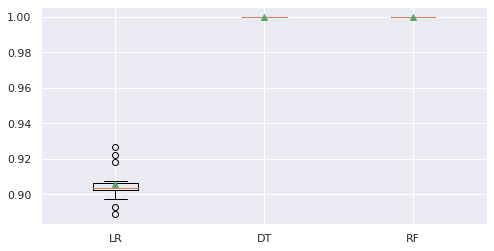

validacion


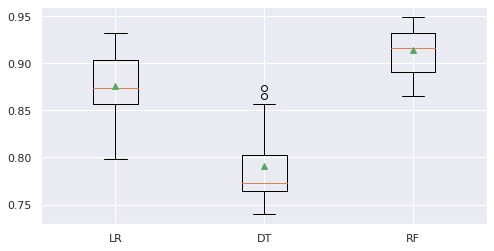

In [43]:
print("entrenamiento")
sns.set(rc={'figure.figsize':(8,4)})
bpGmean = list()
for i in range(len(resultados)):
  rr = resultados[i]['train_recall']
  bpGmean.append(rr)

plt.boxplot(bpGmean, labels=nombres, showmeans=True)
plt.show()
print("validacion")
bpGmean = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bpGmean.append(rr)

plt.boxplot(bpGmean, labels=nombres, showmeans=True)
plt.show()

explicar porque es evidente que los arboles de decision estan sobreentrenados

## e. curvas de aprendizaje

In [44]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, ejeyName = "f1-score"):
    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
   
    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(ejeyName)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

def mi_ModeloYCurvas(X_tv_set, y_tv_set, modelo_aplica, 
                     columnasTransformer_aplicar, metrica = 'f1',
                     modelos_tipo = 1, ejeyName = "f1-score"):

  pipe = columnasTransformer_aplicar
  Xx = pipe.fit_transform(X_tv_set)

  mi_kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state=7)
       
  if(modelos_tipo == 1):

    delta_train_sz = np.linspace(0.1, 1, 20)
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo_aplica,    
                                                    X = X_tv_set,
                                                    y = y_tv_set,
                                                    cv = mi_kfold,
                                                    train_sizes = delta_train_sz,
                                                    scoring=metrica,
                                                    random_state=7)
    # Obtenemos el gráfico con las curvas de aprendizaje:
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, ejeyName)

  if(modelos_tipo == 2):
    
    delta_train_sz = np.linspace(1, 20, 20)    
    train_scores, valid_scores = validation_curve(modelo_aplica,
                                                  X = X_tv_set,
                                                  y = y_tv_set,
                                                  param_name="max_depth",
                                                  param_range = delta_train_sz,
                                                  cv= mi_kfold,
                                                  scoring=metrica)
    
    # Obtenemos el gráfico con las curvas de aprendizaje:
    mi_LearningCurvePlot(delta_train_sz, train_scores, valid_scores)


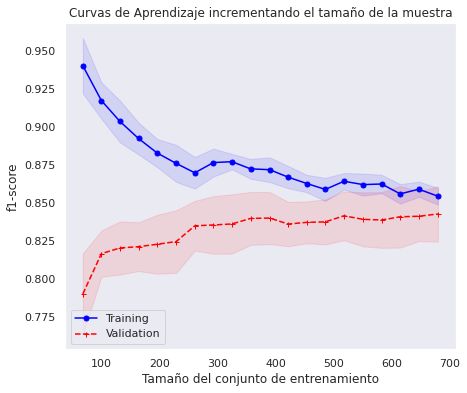

In [45]:
model, nombres = get_models()
## regresion logistica ## learning_curve()
mi_ModeloYCurvas(X_tv, ytv, model[0], columnasTransformer) 

Comentario

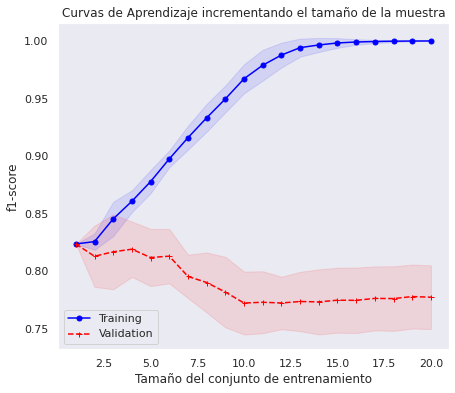

In [46]:
## arbol de decision
mi_ModeloYCurvas(X_tv, ytv, model[1], columnasTransformer, modelos_tipo = 2) 

Comentario

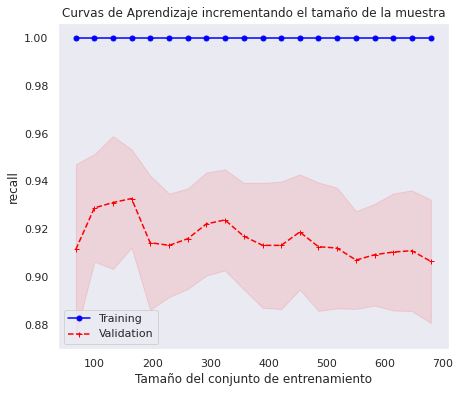

In [47]:
## random forest
mi_ModeloYCurvas(X_tv, ytv, model[2], columnasTransformer, metrica = 'recall', ejeyName = "recall") 

Comentario

#**Ejercicio-5.**



## Regresion logistica a.- y b.-

c, solver, class_weight y penalty

In [29]:
## regularizacion: ridge l2
modelo = LogisticRegression(max_iter=10000, random_state=7)

dicc_grid = {'penalty': ['l1','l2'],
             'class_weight': ['balanced',None],
             'C':[0.0001,0.01,0.1, 0.2, 0.3, 1.0,10.,20.,30.],
             'solver':['liblinear','saga']
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring='f1')

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_tv)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30 
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de f1 obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de recall obtenido con la mejor combinación: 0.8411141320743173
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.2, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Métrica utilizada: f1


In [34]:
LogisticModel = LogisticRegression(penalty = 'l2', class_weight = None, solver = 'saga', C = 0.2, max_iter = 10000, random_state=7)

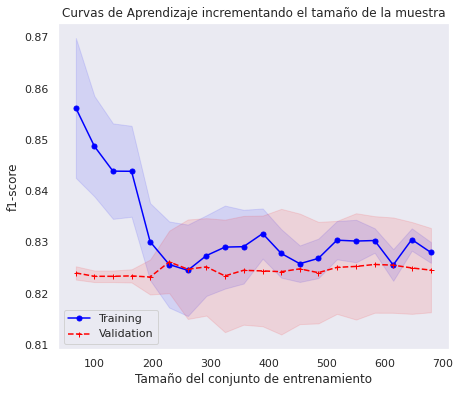

In [35]:
mi_ModeloYCurvas(X_tv, ytv, LogisticModel, columnasTransformer) 

## arbol de decision c.- y d.-

ccp_alpha, criterion, max_depth, min_samples_split y class_weight

In [68]:
## regularizacion: ridge l2
modelo = DecisionTreeClassifier(random_state=7)

dicc_grid = {'criterion': ['gini','entropy'],
             'ccp_alpha': [0.1, 0.2, 0.4, 0.7, 0.01],
             'class_weight': ['balanced',None],
             'max_depth':[2, 4, 6, 8, 12, 16],
             'min_samples_split':[5, 10, 15, 20, 30, 50]
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring='precision')

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_tv)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30 
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de recall obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de recall obtenido con la mejor combinación: 0.8835724707447891
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 50}
Métrica utilizada: precision


In [69]:
dTreeClasf = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.01, class_weight = 'balanced',
                                    max_depth = 4, min_samples_split =50)

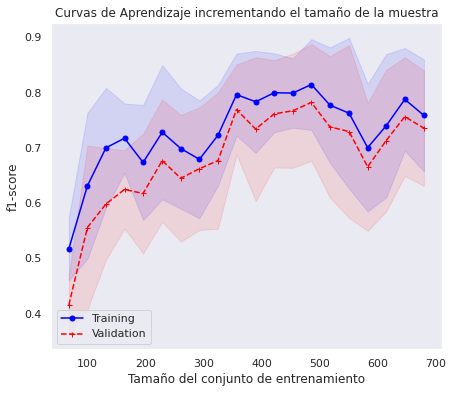

In [71]:
mi_ModeloYCurvas(X_tv, ytv, dTreeClasf, columnasTransformer, metrica = 'recall') 

## random forest e.- y f.-

 ccp_alpha, criterion, max_depth, min_samples_split y class_weight

In [ ]:
## regularizacion: ridge l2
modelo = LogisticRegression(max_iter=10000, random_state=7)

dicc_grid = {'penalty': ['l1','l2'],
             'class_weight': ['balanced',None],
             'C':[0.0001,0.01,0.1, 0.2, 0.3, 1.0,10.,20.,30.],
             'solver':['liblinear','saga']
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring='f1')

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_tv)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30 
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de recall obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

#**Ejercicio-6.**


## regresion logistica a.-

In [ ]:
None

## arbol de decision b.-

## random forest c.

###**Fin de la Actividad de la semana 6.**